# Problem statement:

Attached is a dataset which shows the flower classification ML problem. The task is to predict the class of the plant based on certain features given in the excel file. The xlsx has 2 components one showing the variables data and another file showing the explanation of what each of these variables mean.


For this problem, ignore the problem metrics. Ignore the units of tree length like mm or cm. For e.g. do not think that the tree length is in mm or cm. All the measures are metric-less (unit less) and for this problem treat each column in that capacity.

For the dataset, implement the Random Forest classifier using Python. 

In [1]:
import numpy as np
import pandas as pd

## 1. Import the libraries and Load the dataset and Remove/replace missing values (if any) 

In [2]:
#Load xls file
plant_tree_dataset = pd.read_excel("./Plant_Tree_data.xlsx") 
print("The data set has {} rows and {} columns".format(plant_tree_dataset.shape[0],plant_tree_dataset.shape[1]))
display(plant_tree_dataset.describe())
display(plant_tree_dataset.head())

The data set has 17898 rows and 9 columns


,LeafLength,LeafBreadth,ErrorLeafLength,ErrorLeafBreadth,LeafCurveAngle,EdgeCurvatureAngle,ErrorLeafCurvature,TreeLength,TreeType
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309330,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392141,110.642211,34.539844,1191.000837,1.000000


,LeafLength,LeafBreadth,ErrorLeafLength,ErrorLeafBreadth,LeafCurveAngle,EdgeCurvatureAngle,ErrorLeafCurvature,TreeLength,TreeType
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [3]:
# Finding Missing values
display(plant_tree_dataset.dtypes.value_counts())

float64    8
int64      1
dtype: int64

In [4]:
# Out of 9 columns 8 are of type float and 1 is of type Integer and there are no Object types.
#Now find if there are any missing values for each columns.
plant_tree_dataset.isnull().sum()

LeafLength            0
LeafBreadth           0
ErrorLeafLength       0
ErrorLeafBreadth      0
LeafCurveAngle        0
EdgeCurvatureAngle    0
ErrorLeafCurvature    0
TreeLength            0
TreeType              0
dtype: int64

##### As we can see there are no missing values, so we don't need to remove or replace anything.

## 2. Split features and labels

In [5]:
# Extract Feature (Independent variables)
X = plant_tree_dataset.iloc[:,:-1].values
print('Independet Variables:')
print(X)
print()

#Extract Label (dependent variable)
Y = plant_tree_dataset.iloc[:, -1].values
print('Dependent Variables:')
print(Y)

#from sklearn.preprocessing import StandardScaler
# scaling the dataset
#scaller = StandardScaler()
#X = scaller.fit_transform(banknote_dataset)

Independet Variables:
[[140.5625      55.68378214  -0.23457141 ...  19.11042633   7.97553179
   74.24222492]
 [102.5078125   58.88243001   0.46531815 ...  14.86014572  10.57648674
  127.3935796 ]
 [103.015625    39.34164944   0.32332837 ...  21.74466875   7.73582202
   63.17190911]
 ...
 [119.3359375   59.93593941   0.1593631  ...  58.8720002    2.49951714
    4.59517265]
 [114.5078125   53.90239966   0.20116138 ...  13.38173065  10.00796731
  134.2389095 ]
 [ 57.0625      85.79734025   1.40639105 ...  64.71256228  -1.59752658
    1.42947536]]

Dependent Variables:
[0 0 0 ... 0 0 0]


## 3. Split train and test data

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
#Split the data into trainand test dataset: 80- 20 Split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 101)
print("X_train shape:", X_train.shape)
print("X_test shape", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape: {}", y_test.shape)

X_train shape: (14318, 8)
X_test shape (3580, 8)
y_train shape: (14318,)
y_test shape: {} (3580,)


## 4. Implement Random Forest Classifier

In [8]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train,y_train)
## Prediction
y_pred=classifier.predict(X_test)

## 5. Calculate accuracy measures

In [9]:
from sklearn.metrics import accuracy_score
## compute and print Accuracy
score=accuracy_score(y_test,y_pred)
print('Accuracy:',  score)

Accuracy: 0.9835195530726257


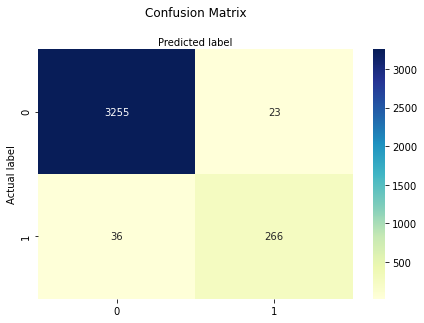

In [10]:
#Confusion Matrix
#Calculate confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sb

random_forest_confusion_matrix  = confusion_matrix(y_test, y_pred)

#Plot the confusion matrix.
class_names = ['Fake','Authentic']
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sb.heatmap(pd.DataFrame(random_forest_confusion_matrix), annot = True, 
           cmap='YlGnBu', fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion Matrix\n')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

#### Using Random Forest algorithm we have achieved the accuracy of 98.29%

Now lets see if we can get better result applying Neural Net?

# For the same dataset, implement classification with the Neural Network using Keras in Python

#### First 3 steps of Loading data, splitting features and labels , splitting in to training and test data set wil be same.So we are reusing these steps.

In [11]:
import keras
from keras.models import Model, Sequential
from keras.layers import Dense, Activation
import keras.backend as K
from keras.optimizers import Adam
from keras import optimizers

In [12]:
#Clear the session
K.clear_session()

In [13]:
#Construct the model
nin = X_train.shape[1]
nout = np.max(y_train) + 1
nh = 100

model = Sequential()
model.add(Dense(nh, input_shape=(nin, ), activation='relu', name= 'fc1'))
model.add(Dense(nh, activation='relu', name='fc2'))
model.add(Dense(nout, activation = 'softmax', name = 'output'))

In [14]:
#Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
fc1 (Dense)                  (None, 100)               900       
_________________________________________________________________
fc2 (Dense)                  (None, 100)               10100     
_________________________________________________________________
output (Dense)               (None, 2)                 202       
Total params: 11,202
Trainable params: 11,202
Non-trainable params: 0
_________________________________________________________________


In [15]:
#Learning rate as 0.001
opt = optimizers.Adam(lr = 0.001)
model.compile(optimizer=opt, loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])



In [16]:
batch_size = 100
model.fit(X_train, y_train, epochs = 10, batch_size=batch_size, validation_data=(X_test, y_test))
results = model.evaluate(X_test, y_test)

print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))


Epoch 1/10
144/144 [==============================] - 2s 10ms/step - loss: 0.2816 - accuracy: 0.9485 - val_loss: 0.0884 - val_accuracy: 0.9788
Epoch 2/10
144/144 [==============================] - 0s 3ms/step - loss: 0.1142 - accuracy: 0.9713 - val_loss: 0.1762 - val_accuracy: 0.9645
Epoch 3/10
144/144 [==============================] - 0s 3ms/step - loss: 0.1181 - accuracy: 0.9700 - val_loss: 0.1154 - val_accuracy: 0.9774
Epoch 4/10
144/144 [==============================] - 0s 3ms/step - loss: 0.1359 - accuracy: 0.9671 - val_loss: 0.0900 - val_accuracy: 0.9751
Epoch 5/10
144/144 [==============================] - 0s 3ms/step - loss: 0.0963 - accuracy: 0.9737 - val_loss: 0.0975 - val_accuracy: 0.9754
Epoch 6/10
144/144 [==============================] - 0s 3ms/step - loss: 0.1115 - accuracy: 0.9707 - val_loss: 0.0847 - val_accuracy: 0.9793
Epoch 7/10
144/144 [==============================] - 0s 3ms/step - loss: 0.1017 - accuracy: 0.9730 - val_loss: 0.0890 - val_accuracy: 0.9754
Epoch

#### Results:
The accuracy of Neural net classifier is fractionally lower than the accuracy with Random Forest. (0.978 vs 0.983)

Next, we are going to try with a higher learning rate of 0.01 to see if we can improve the accuracy of the model.

In [17]:
#Clear the session
K.clear_session()

#Construct the model
nin = X_train.shape[1]
nout = np.max(y_train) + 1
nh = 100

model = Sequential()
model.add(Dense(nh, input_shape=(nin, ), activation='relu', name= 'fc1'))
model.add(Dense(nh, activation='relu', name='fc2'))
model.add(Dense(nout, activation = 'softmax', name = 'output'))

In [18]:
#Learning rate as 0.01
opt = optimizers.Adam(lr = 0.01)
model.compile(optimizer=opt, loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

batch_size = 100
model.fit(X_train, y_train, epochs = 10, batch_size=batch_size, validation_data=(X_test, y_test))
results = model.evaluate(X_test, y_test)

print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

Epoch 1/10
144/144 [==============================] - 1s 5ms/step - loss: 1.8520 - accuracy: 0.9184 - val_loss: 0.1866 - val_accuracy: 0.9668
Epoch 2/10
144/144 [==============================] - 0s 3ms/step - loss: 0.1595 - accuracy: 0.9643 - val_loss: 0.0896 - val_accuracy: 0.9726
Epoch 3/10
144/144 [==============================] - 0s 3ms/step - loss: 0.1015 - accuracy: 0.9714 - val_loss: 0.0992 - val_accuracy: 0.9662
Epoch 4/10
144/144 [==============================] - 0s 3ms/step - loss: 0.0966 - accuracy: 0.9726 - val_loss: 0.0763 - val_accuracy: 0.9788
Epoch 5/10
144/144 [==============================] - 0s 3ms/step - loss: 0.0892 - accuracy: 0.9752 - val_loss: 0.0738 - val_accuracy: 0.9793
Epoch 6/10
144/144 [==============================] - 0s 3ms/step - loss: 0.0908 - accuracy: 0.9737 - val_loss: 0.0752 - val_accuracy: 0.9782
Epoch 7/10
144/144 [==============================] - 0s 3ms/step - loss: 0.0865 - accuracy: 0.9741 - val_loss: 0.0731 - val_accuracy: 0.9782
Epoch 

##### So, why did the learning rate have to increased?
The learning rate is used to find the global minima. If the learning rate is small, the model reaches the global minima with better accuracy because it is slow. However, if it is too slow, we might end up reaching a local minima rather than the global minima (also depending on where you begin traversal). For instance, Increasing the learning rate has slightly increased the accuracy from 97.8% to 97.9%.Therefore, we concluded that the learning rate of 0.01 is the optimal learning rate.

#### Conclusion:
With the learning rate of 0.01, the Neural net classifier gives an accuracy of 97.9% which is very close to the accuracy of the Random Forest 98.2%. 

Furthermore, for this dataset, Random Forest is sufficient enough to provide accurate results, and a neural net is not necessary. However, it can help with understanding the dataset better.